In [201]:
# dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

financials = "./Resources/Tesla Financials/Testla Operations Financials.csv"
stock_price = "./Resources/Tesla Stock Price/TSLAstock.csv"
ps_ratio = "./Resources/Tesla Stock Price/TSLApsratio.xlsx"
twitter = "./Resources/Tesla Twitter/twitter tweets.csv"

In [202]:
# set df_variable: financial statement
financials_csv = pd.read_csv(financials)
financials_df = financials_csv[["date","operating_income","cf_from_operations"]]

In [203]:
# set df_variabel: stock price
stock_price_csv = pd.read_csv(stock_price)
stock_price_df = stock_price_csv[["date","Close","Volume"]]

In [204]:
# set df_variable: price-to-sales ratio
ps_ratio_xlsx = pd.read_excel(ps_ratio)
ps_ratio_df = ps_ratio_xlsx[["date","P/S Ratio"]]

In [205]:
# set df_variable: twitter sentiment
twitter_csv = pd.read_csv(twitter)
twitter_df = twitter_csv[["date","TSLA_compound","ElonMusk_compound"]]

In [206]:
# merge: financials and stock price (AS: tesla_df_1)
tesla_df_1 = pd.merge(financials_df,stock_price_df, how="outer",on="date")

In [207]:
# merge: tesla_df_1 and ps ratio (AS: tesla_df_2)
tesla_df_2 = pd.merge(tesla_df_1,ps_ratio_df, how="outer",on="date")

In [208]:
# merge: tesla_df_2 and twitter (AS: tesla_df_3)
tesla_df_3 = pd.merge(tesla_df_2,twitter_df, how="outer",on="date")

In [209]:
# converting column: convert 'date' column to pandas.to_datetime(), THEN adding it as a new column to df
tesla_df_3["date_converted"] = pd.to_datetime(tesla_df_3["date"])

In [222]:
# sort: by date (final wrangling/applying as: tesla_df )
tesla_df = tesla_df_3.sort_values(by=["date_converted"],ascending = False)
tesla_df.head()

# use to this code: to audit via excel
tesla_df.to_csv("tesla_df.csv",index=False,header=True)

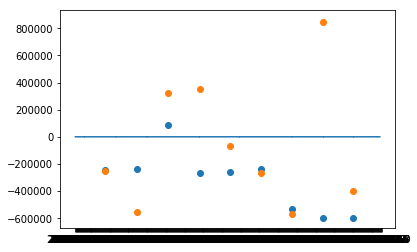

In [217]:
# plot - scatter: operating income
plt.scatter(tesla_df["date"],
            tesla_df["operating_income"])
#             s=<var>,
#             c=<var>,
#             label=<var>,
#             alpha=<int>
#             edgecolors="none")

# plot - scatter: cash flows
plt.scatter(tesla_df["date"],
            tesla_df["cf_from_operations"])
#             s=<var>,
#             c=<var>,
#             label=<var>,
#             alpha=<int>
#             edgecolors="none")

# plot - line: close stock prices
plt.plot(tesla_df["date"],
         tesla_df["Close"])

plt.show()

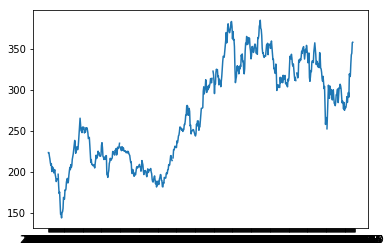

In [219]:
# plot - line: close stock prices
plt.plot(tesla_df["date"],
         tesla_df["Close"])

plt.show()

# Marianas Code - For Dual Axis

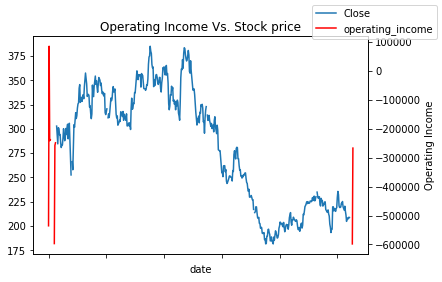

In [90]:
plt.figure(figsize=(10,5))

ax = tesla_df.plot(x="date", y="Close", legend=False)
ax2 = ax.twinx()
tesla_df.plot(x="date", y="operating_income", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.title("Operating Income Vs. Stock price")
plt.xlabel("Date")
plt.ylabel("Operating Income")

plt.show()